<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/Cats%20and%20Dogs%20Classifier/Convolutional%20Network/CatsAndDogsCovnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cats and Dogs Classifier
#### This machine learning algorithm classifies cats and dogs using a covnet

In [2]:
import os, shutil
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from keras.applications import VGG16
from google.colab import drive

Using TensorFlow backend.


### Define paths to the dataset

In [3]:
drive.mount('/content/drive')
cats_and_dogs = '/content/drive/My Drive/Datasets/CatsAndDogs'
os.chdir(cats_and_dogs)
print(os.listdir())

train_dir = cats_and_dogs + '/train'
validation_dir = cats_and_dogs + '/validation'
test_dir = cats_and_dogs + '/test'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
['test', 'train', 'validation']


### Create an ImageDataGenerator that will also augment the data

In [0]:
# Add Data Augmentation to your training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Create batches of data for training, validation and testing

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Create a Convolutional Neural Network

In [0]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

### Train and save the model

In [7]:
model = create_model()
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  verbose=2,
  validation_steps=50)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 719s - loss: 0.6917 - acc: 0.5189 - val_loss: 0.6778 - val_acc: 0.5958
Epoch 2/100
 - 242s - loss: 0.6793 - acc: 0.5643 - val_loss: 0.6695 - val_acc: 0.5638
Epoch 3/100
 - 243s - loss: 0.6612 - acc: 0.5914 - val_loss: 0.6462 - val_acc: 0.6079
Epoch 4/100
 - 244s - loss: 0.6556 - acc: 0.6212 - val_loss: 0.6261 - val_acc: 0.6314
Epoch 5/100
 - 243s - loss: 0.6430 - acc: 0.6144 - val_loss: 0.5985 - val_acc: 0.6783
Epoch 6/100
 - 243s - loss: 0.6261 - acc: 0.6400 - val_loss: 0.5972 - val_acc: 0.6637
Epoch 7/100
 - 242s - loss: 0.6051 - acc: 0.6696 - val_loss: 0.5740 - val_acc: 0.6948
Epoch 8/100
 - 242s - loss: 0.5992 - acc: 0.6728 - val_loss: 0.5704 - val_acc: 0.6901
Epoch 9/100
 - 240s - loss: 0.5832 - acc: 0.6839 - val_loss: 0.5466 - val_acc

In [0]:
model.save('cats_and_dogs_small_1.h5')

### Plot results

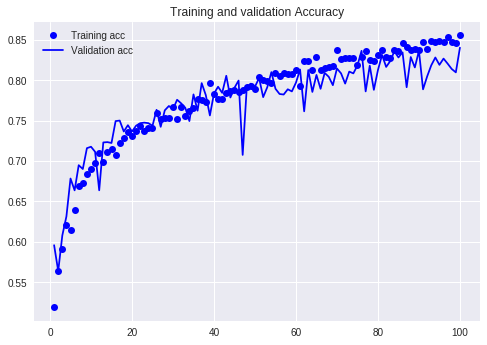

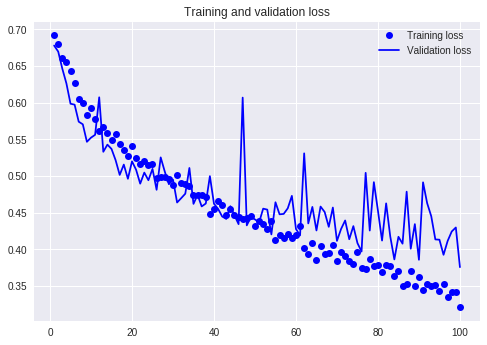

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()